In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, AveragePooling2D
import time
from scipy.fftpack import dct

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATADIR = "/content/drive/MyDrive/trdata"
CATEGORIES = ["Alive", "Silicone"]

In [ ]:
training_data = []
def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array=abs(dct(dct(img_array)))
        new_array=new_array[0:227,0:227]
        #new_array=img_array[0:227,0:227]
        training_data.append([new_array, class_num])
      except Exception as e:
        pass
create_training_data() 

In [ ]:
import random

random.shuffle(training_data)
x = []
y = []
for features, label in training_data:
  x.append(features)
  y.append(label)
x = np.array(x)
y = np.array(y)
import pickle
pickle_out = open("x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

In [ ]:
DATADIR1 = "/content/drive/MyDrive/tsdata"
CATEGORIES1 = ["Alive", "Silicone"]

In [ ]:
testing_data = []
def create_testing_data():
  for category in CATEGORIES1:
    path = os.path.join(DATADIR1, category)
    class_num = CATEGORIES1.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        #new_array=abs(dct(dct(img_array)))
        #new_array=new_array[0:230,0:230]
        new_array=img_array[0:227,0:227]
        testing_data.append([new_array, class_num])
      except Exception as e:
        pass
create_testing_data() 

In [ ]:

random.shuffle(testing_data)
m = []
n = []
for features, label in training_data:
  m.append(features)
  n.append(label)
m = np.array(m)
n = np.array(n)
import pickle
pickle_out = open("m.pickle","wb")
pickle.dump(m, pickle_out)
pickle_out.close()

pickle_out = open("n.pickle","wb")
pickle.dump(n, pickle_out)
pickle_out.close()
pickle_in = open("m.pickle","rb")
m = pickle.load(pickle_in)

In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = [227,227,1]))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Conv2D(256,(3,3)))
#model.add(Activation("relu"))
model.add(Conv2D(256,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(256,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Conv2D(384,(3,3)))
#model.add(Activation("relu"))
#model.add(Conv2D(384,(3,3)))
#model.add(Activation("relu"))
#model.add(Conv2D(256,(3,3)))
#model.add(Activation("relu"))
#model.add(MaxPool2D(pool_size=(2,2)))


#model.add(Conv2D(512,(3,3)))
#model.add(Activation("relu"))
model.add(Conv2D(512,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(512,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Conv2D(512,(3,3)))
#model.add(Activation("relu"))
model.add(Conv2D(512,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(512,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Dense(4096))
model.add(Dense(1,kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Activation('linear'))
model.compile(loss="hinge",
              optimizer="adam",
              metrics=['accuracy'])
#model.compile(loss="binary_crossentropy",
 #             optimizer="adam",
  #            metrics=['accuracy'])
start = time.time()
history_alexnet=model.fit(x, y, batch_size=32, epochs=12, validation_split=0.1)
print("Total time: ", time.time() - start, "seconds")

Epoch 1/12
30/30 [==============================] - 26s 399ms/step - loss: 352815.2500 - accuracy: 0.5160 - val_loss: 21.1352 - val_accuracy: 0.3942
Epoch 2/12
30/30 [==============================] - 9s 310ms/step - loss: 17.2081 - accuracy: 0.5962 - val_loss: 1.3907 - val_accuracy: 0.5288
Epoch 3/12
30/30 [==============================] - 9s 309ms/step - loss: 0.9860 - accuracy: 0.6517 - val_loss: 0.7045 - val_accuracy: 0.6923
Epoch 4/12
30/30 [==============================] - 9s 310ms/step - loss: 0.5103 - accuracy: 0.7863 - val_loss: 0.6444 - val_accuracy: 0.7115
Epoch 5/12
30/30 [==============================] - 9s 311ms/step - loss: 0.6756 - accuracy: 0.7051 - val_loss: 0.5732 - val_accuracy: 0.7596
Epoch 6/12
30/30 [==============================] - 9s 311ms/step - loss: 0.5478 - accuracy: 0.7553 - val_loss: 0.2337 - val_accuracy: 0.9135
Epoch 7/12
30/30 [==============================] - 9s 314ms/step - loss: 0.3322 - accuracy: 0.8654 - val_loss: 0.2150 - val_accuracy: 0.932

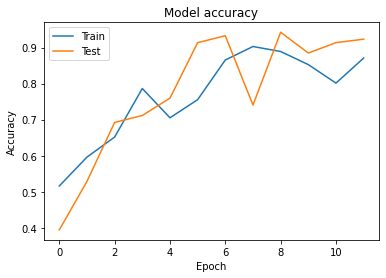

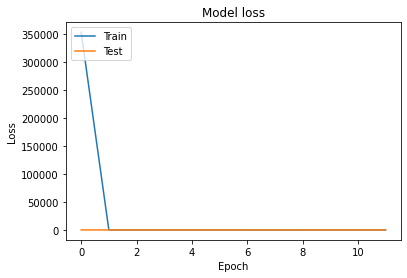

Test loss: 0.2173016220331192
Test accuracy: 0.879807710647583


In [ ]:
plt.plot(history_alexnet.history['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history_alexnet.history['loss'])
plt.plot(history_alexnet.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
score = model.evaluate(x, y, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

In [ ]:
y_pred = model.predict(m)
y_pred=np.where(y_pred > 0.5, 1,0)

33/33 [==============================] - 4s 112ms/step


In [ ]:
from sklearn.metrics import recall_score
tpr = recall_score(n, y_pred)   # it is better to name it y_test 
# to calculate, tnr we need to set the positive label to the other class
# I assume your negative class consists of 0, if it is -1, change 0 below to that value
tnr = recall_score(n, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

In [ ]:
(fpr+fnr)/2

0.12019230769230771